In [2]:
data = pd.read_csv('AmesHousing.tsv', sep='\t')
data.head(2)
data.shape

df = data.copy()
RMSE = []

In [3]:
def transform_features(df):
    return df.copy()

def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    
    numeric_df = df.select_dtypes(include=['int', 'float'])
    
    train = numeric_df.iloc[:1460]
    test = numeric_df.iloc[1460:]
    
    target = 'SalePrice'
    features =  train.drop([target], axis='columns').columns
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    labels = lr.predict(test[features])
    
    return mean_squared_error(labels, test[target])**0.5
    

transform_data = transform_features(data)
filtered_data = select_features(transform_data)
RMSE.append(train_and_test(filtered_data))
RMSE

[57088.25161263909]

## Feature Engineering

drop any columns with greater than 25% null values

In [4]:
print(data.shape)
null_count = df.isnull().sum()
null_cols = null_count[null_count>0].index
null_count = df[null_cols].isnull().sum()

# > 25% null values

drop_null_cols = null_count[null_count/len(df)*100 >=25].index
df.drop(drop_null_cols, axis='columns', inplace=True)
print(data.shape)

(2930, 82)
(2930, 82)


For columns with less than 25% Missing Values:

1. impute numeric coumns with mode()
2. drop string columns

In [5]:
# < 25% null values

five_null_cols = null_count[null_count/len(df)*100 < 25].index
num_null_cols = df[five_null_cols].select_dtypes(include=['int', 'float']).columns

for col in num_null_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# check null count
df[num_null_cols].isnull().sum()

Lot Frontage      0
Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
dtype: int64

In [6]:
# < 25% null values where dtype is string

five_null_cols = null_count[null_count/len(df)*100 < 25].index
drop_null_cols = df[five_null_cols].select_dtypes(include=['object']).columns

df.drop(drop_null_cols, axis='columns', inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 66 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2930 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2

In [8]:
yearsold = df['Yr Sold'] - df['Year Built']
yearsold[yearsold<0]

2180   -1
dtype: int64

In [9]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [10]:
# adding columns
df['Years Before Sold'] = yearsold
df['Years Since Remod']= years_since_remod
     
#dropping rows with -ve value
df.drop([2180, 1702, 2181], inplace=True)     

Removing Columns:
1. Not needed for ML
2. data leakage

In [11]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

Updating the transform_features() function to bring in all the feature engineering we have experimented with

In [12]:
def transform_features(df):
    
    null_count = df.isnull().sum()
    null_cols = null_count[null_count>0].index
    null_count = df[null_cols].isnull().sum()

    # > 25% null values
    drop_null_cols = null_count[null_count/len(df)*100 >=25].index
    df.drop(drop_null_cols, axis='columns', inplace=True)

    # < 25% null values

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    num_null_cols = df[five_null_cols].select_dtypes(include=['int', 'float']).columns

    for col in num_null_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # < 25% null values where dtype is string

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    drop_null_cols = df[five_null_cols].select_dtypes(include=['object']).columns

    df.drop(drop_null_cols, axis='columns', inplace=True)
    
    # new columns
    yearsold = df['Yr Sold'] - df['Year Built']
    yearsold[yearsold<0]
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    
    # adding columns
    df['Years Before Sold'] = yearsold
    df['Years Since Remod']= years_since_remod
     
    # dropping rows with -ve value
    df.drop([2180, 1702, 2181], inplace=True)  
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    
    numeric_df = df.select_dtypes(include=['int', 'float'])
    
    train = numeric_df.iloc[:1460]
    test = numeric_df.iloc[1460:]
    
    target = 'SalePrice'
    features =  train.drop([target], axis='columns').columns
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    labels = lr.predict(test[features])
    
    return mean_squared_error(labels, test[target])**0.5
    
data = pd.read_csv('AmesHousing.tsv', sep='\t')
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
RMSE.append(train_and_test(filtered_data))
RMSE



[57088.25161263909, 55275.36731241307]

Checking for Correlation of features with "SalePrice"

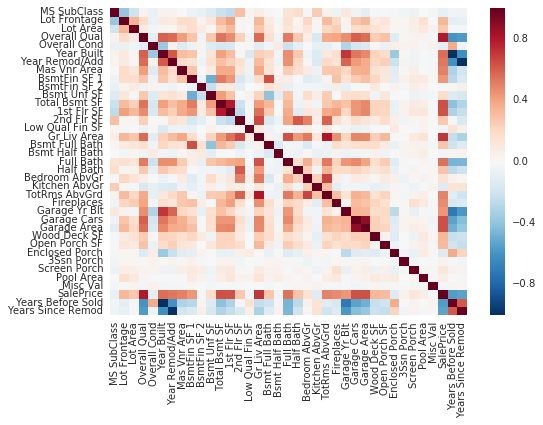

In [13]:
import seaborn as sns

numeric_transform_data = transform_data.select_dtypes(include=['int', 'float'])

sns.heatmap(numeric_transform_data.corr())

In [14]:
numeric_corr = numeric_transform_data.corr()['SalePrice'].abs().sort_values(ascending=False)
numeric_corr[numeric_corr>0.4]

# taking o.4 corr as cutoff. This is an artbitary value and showed
# be expreimented with later
drop_numeric_features = numeric_corr[numeric_corr<=0.4].index
transform_data.drop(drop_numeric_features, axis='columns', inplace=True)

In [15]:
def transform_features(df):
    
    null_count = df.isnull().sum()
    null_cols = null_count[null_count>0].index
    null_count = df[null_cols].isnull().sum()

    # > 25% null values
    drop_null_cols = null_count[null_count/len(df)*100 >=25].index
    df.drop(drop_null_cols, axis='columns', inplace=True)

    # < 25% null values

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    num_null_cols = df[five_null_cols].select_dtypes(include=['int', 'float']).columns

    for col in num_null_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # < 25% null values where dtype is string

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    drop_null_cols = df[five_null_cols].select_dtypes(include=['object']).columns

    df.drop(drop_null_cols, axis='columns', inplace=True)
    
    # new columns

    
    yearsold = df['Yr Sold'] - df['Year Built']
    yearsold[yearsold<0].tolist
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    
    # adding columns
    df['Years Before Sold'] = yearsold
    df['Years Since Remod']= years_since_remod
     
    # dropping rows with -ve value
    df.drop([2180, 1702, 2181], inplace=True)  
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df, cutoff_coeff=0.4):
    
    numeric_transform_data = df.select_dtypes(include=['int', 'float'])
    numeric_corr = numeric_transform_data.corr()['SalePrice'].abs().sort_values(ascending=False)
    numeric_corr[numeric_corr>0.4]

    # taking o.4 corr as cutoff. This is an artbitary value and showed
    # be expreimented with later
    drop_numeric_features = numeric_corr[numeric_corr<=cutoff_coeff].index
    numeric_transform_data.drop(drop_numeric_features, axis='columns', inplace=True)
    return numeric_transform_data

def train_and_test(df):
    
    numeric_df = df.select_dtypes(include=['int', 'float'])
    
    train = numeric_df.iloc[:1460]
    test = numeric_df.iloc[1460:]
    
    target = 'SalePrice'
    features =  train.drop([target], axis='columns').columns
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    labels = lr.predict(test[features])
    
    return mean_squared_error(labels, test[target])**0.5
    
data = pd.read_csv('AmesHousing.tsv', sep='\t')
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
RMSE.append(train_and_test(filtered_data))
RMSE

print(filtered_data.columns)

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'SalePrice', 'Years Before Sold',
       'Years Since Remod'],
      dtype='object')


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



check for categorical features

In [16]:
non_numeric = transform_data.select_dtypes(include
                                           =['object'])
for col in non_numeric.columns:
    print(col)
    print(non_numeric[col].value_counts())

MS Zoning
RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
Street
Pave    2915
Grvl      12
Name: Street, dtype: int64
Lot Shape
Reg    1859
IR1     976
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Land Contour
Lvl    2632
HLS     120
Bnk     115
Low      60
Name: Land Contour, dtype: int64
Utilities
AllPub    2924
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Lot Config
Inside     2138
Corner      510
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Land Slope
Gtl    2786
Mod     125
Sev      16
Name: Land Slope, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
Gilbert    165
NridgHt    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale  

Which categorical columns should we keep?

In [17]:
non_numeric.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [18]:
cat_cols = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive']

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [19]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [20]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_data.columns:
        transform_cat_cols.append(col)
        
## How many unique values in each categorical column?
uniqueness_counts = transform_data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_data = transform_data.drop(drop_nonuniq_cols, axis=1)

In [21]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_data.select_dtypes(include=['object'])
for col in text_cols:
    transform_data[col] = transform_data[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_data = pd.concat([
    transform_data, 
    pd.get_dummies(transform_data.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

Update selected_features()

In [22]:
def transform_features(df):
    
    null_count = df.isnull().sum()
    null_cols = null_count[null_count>0].index
    null_count = df[null_cols].isnull().sum()

    # > 25% null values
    drop_null_cols = null_count[null_count/len(df)*100 >=25].index
    df.drop(drop_null_cols, axis='columns', inplace=True)

    # < 25% null values

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    num_null_cols = df[five_null_cols].select_dtypes(include=['int', 'float']).columns

    for col in num_null_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # < 25% null values where dtype is string

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    drop_null_cols = df[five_null_cols].select_dtypes(include=['object']).columns

    df.drop(drop_null_cols, axis='columns', inplace=True)
    
    # new columns
    yearsold = df['Yr Sold'] - df['Year Built']
    yearsold[yearsold<0]
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    
    # adding columns
    df['Years Before Sold'] = yearsold
    df['Years Since Remod']= years_since_remod
     
    # dropping rows with -ve value
    df.drop([2180, 1702, 2181], inplace=True)  
    
    df = df.drop(["Year Built", "Year Remod/Add"], axis=1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)
    
    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df, nominal_features, cutoff_coeff=0.4, cutoff_uniqueness=10):
    
    numeric_transform_data = df.select_dtypes(include=['int', 'float'])
    numeric_corr = numeric_transform_data.corr()['SalePrice'].abs().sort_values(ascending=False)
    numeric_corr[numeric_corr>cutoff_coeff]

    # taking o.4 corr as cutoff. This is an artbitary value and showed
    # be expreimented with later
    drop_numeric_features = numeric_corr[numeric_corr<=cutoff_coeff].index
    df.drop(drop_numeric_features, axis='columns', inplace=True)
    
    ## Which categorical columns have we still carried with us? We'll test tehse 
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    ## How many unique values in each categorical column?
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    ## Aribtrary cutoff of 10 unique values (worth experimenting)
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > cutoff_uniqueness].index
    df.drop(drop_nonuniq_cols, axis='columns', inplace=True)

    ## Select just the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')

    ## Create dummy columns and add back to the dataframe!
    df = pd.concat([
        df, 
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis='columns')
    
    df.drop(text_cols,axis='columns', inplace=True)
    
    return df

def train_and_test(df):
    
    numeric_df = df.select_dtypes(include=['int', 'float'])
    
    train = numeric_df.iloc[:1460]
    test = numeric_df.iloc[1460:]
    
    target = 'SalePrice'
    features =  train.drop([target], axis='columns').columns
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    labels = lr.predict(test[features])
    
    return mean_squared_error(labels, test[target])**0.5
    
data = pd.read_csv('AmesHousing.tsv', sep='\t')
transform_data = transform_features(data)
filtered_data = select_features(transform_data, nominal_features)
RMSE.append(train_and_test(filtered_data))
RMSE


[57088.25161263909, 55275.36731241307, 36565.85938231896, 36571.09404570377]

In [23]:
def transform_features(df):
    
    null_count = df.isnull().sum()
    null_cols = null_count[null_count>0].index
    null_count = df[null_cols].isnull().sum()

    # > 25% null values
    drop_null_cols = null_count[null_count/len(df)*100 >=25].index
    df.drop(drop_null_cols, axis='columns', inplace=True)

    # < 25% null values

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    num_null_cols = df[five_null_cols].select_dtypes(include=['int', 'float']).columns

    for col in num_null_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # < 25% null values where dtype is string

    five_null_cols = null_count[null_count/len(df)*100 < 25].index
    drop_null_cols = df[five_null_cols].select_dtypes(include=['object']).columns

    df.drop(drop_null_cols, axis='columns', inplace=True)
    
    # new columns
    yearsold = df['Yr Sold'] - df['Year Built']
    yearsold[yearsold<0]
    
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    years_since_remod[years_since_remod < 0]
    
    # adding columns
    df['Years Before Sold'] = yearsold
    df['Years Since Remod']= years_since_remod
     
    # dropping rows with -ve value
    df.drop([2180, 1702, 2181], inplace=True)  
    df = df.drop(["Year Built", "Year Remod/Add"], axis=1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df

def select_features(df, nominal_features, cutoff_coeff=0.4, cutoff_uniqueness=10):
    
    numeric_transform_data = df.select_dtypes(include=['int', 'float'])
    numeric_corr = numeric_transform_data.corr()['SalePrice'].abs().sort_values(ascending=False)
    numeric_corr[numeric_corr>cutoff_coeff]

    # taking o.4 corr as cutoff. This is an artbitary value and showed
    # be expreimented with later
    drop_numeric_features = numeric_corr[numeric_corr<=cutoff_coeff].index
    df.drop(drop_numeric_features, axis='columns', inplace=True)
    
    ## Which categorical columns have we still carried with us? We'll test tehse 
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    ## How many unique values in each categorical column?
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    ## Aribtrary cutoff of 10 unique values (worth experimenting)
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > cutoff_uniqueness].index
    df.drop(drop_nonuniq_cols, axis='columns', inplace=True)

    ## Select just the remaining text columns and convert to categorical
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')

    ## Create dummy columns and add back to the dataframe!
    df = pd.concat([
        df, 
        pd.get_dummies(df.select_dtypes(include=['category']))
    ], axis='columns')
    
    df.drop(text_cols,axis='columns', inplace=True)
    
    return df

def train_and_test(df, k=0):
    
    numeric_df = df.select_dtypes(include=['int', 'float'])
    lr = LinearRegression()
    
    target = 'SalePrice'
    features =  df.drop([target], axis='columns').columns
    
    np.random.seed(1)
    
    if k == 0:
        train = numeric_df.iloc[:1460]
        test = numeric_df.iloc[1460:]

        lr.fit(train[features], train[target])
        labels = lr.predict(test[features])

        return mean_squared_error(labels, test[target])**0.5
    
    if k == 1:
        
        numeric_df = numeric_df.iloc[np.random.permutation(numeric_df.index)]
        fold_one = numeric_df.iloc[:1460]
        fold_two = numeric_df.iloc[1460:]

        train = fold_one
        test = fold_two
        
        lr.fit(train[features], train[target])
        labels = lr.predict(test[features])
    
        rmse_one = mean_squared_error(labels, test[target])**0.5
        
        train = fold_two
        test = fold_one
        
        lr = LinearRegression()
        lr.fit(train[features], train[target])
        labels = lr.predict(test[features])
    
        rmse_two = mean_squared_error(labels, test[target])**0.5
        print(rmse_one)
        print(rmse_two)
        
        return np.avg([rmse_one, rmse_two])
    
    if k > 1:
        
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train[target])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test[target], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)

        print(rmse_values)
        return np.mean(rmse_values)
            
    
data = pd.read_csv('AmesHousing.tsv', sep='\t')
transform_data = transform_features(data)
filtered_data = select_features(transform_data, nominal_features)
RMSE = train_and_test(filtered_data,k=4)
RMSE


[36729.813612361424, 25681.119883529667, 25549.63390812131, 28487.27798315643]


29111.961346792206

In [24]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=10)

rmse

[28200.00624060384, 29482.412334079603, 25579.21629699266, 24875.77815570782, 23031.663371745464, 48061.09578022281, 26898.105127296327, 30109.04783543803, 23476.688995984405, 24823.893345773537]


28453.79074838445

In [30]:
from sklearn.feature_selection import RFE
# feature extraction
lr = LinearRegression()

target = 'SalePrice'
features = df.drop([target], axis='columns').columns


train = filtered_df.iloc[:1460].to_numpy()
X = train[:,]

rfe = RFE(lr, 3)
fit = rfe.fit(train[features], train[target])

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

KeyError: "Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',\n       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',\n       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',\n       'Condition 2', 'Bldg Type', 'House Style', 'Overall Cond', 'Year Built',\n       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',\n       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',\n       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',\n       'BsmtFin Type 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',\n       'Heating', 'Heating QC', 'Central Air', 'Electrical', '2nd Flr SF',\n       'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath',\n       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'Functional',\n       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',\n       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',\n       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',\n       'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold',\n       'Yr Sold', 'Sale Type', 'Sale Condition'],\n      dtype='object') not in index"

In [36]:

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 6 5 1 1 3]


In [35]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [39]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_

selector.ranking_


array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [41]:
make_friedman1(n_samples=50, n_features=10, random_state=0)

(array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
         0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
        [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
         0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
        [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
         0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194],
        [0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
         0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ],
        [0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
         0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077],
        [0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
         0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559],
        [0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
         0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841],
        [0.97645947, 0.4686